In [1]:
import os, sys
import numpy as np
from PIL import Image

In [11]:
import gdal

base = r'/home/shaun/python/uni_work/ML_project/input'

target_dir = os.path.join(base, 'val_truth')
out_dir = os.path.join(base, 'val_gdal_truth')
    
options_list = ['-ot Byte',
                '-of JPEG',
                '-b 1',
                '-scale']           

options_string = " ".join(options_list)

for infile in os.listdir(target_dir):

    if infile[-3:] == "tif":
        outfile = os.path.join(out_dir, infile[:-3] + "jpeg")
        gdal.Translate(outfile,
                       os.path.join(target_dir, infile),
                       options=options_string)

# The above code simply create a jpg file with band 1 scaled into byte range. 
# You could add more bands by adding, '-b 2' etc. 
# Also notice that scale automatically wraps the entire range into byte range. 
# If you like something else you could use '-scale min_val max_val' in order to specify the range you like, 
# since often you have no need of either the lowest or highest values available.

In [30]:
import gdal

base = r'/home/shaun/python/uni_work/ML_project/input'

target_dir = os.path.join(base, 'val_mask')
out_dir = os.path.join(base, 'val_gdal_mask')
    
options_list = ['-ot Byte',
                '-of JPEG',
                '-b mask',
                '-scale']           

options_string = " ".join(options_list)

for infile in os.listdir(target_dir):

    if infile[-3:] == "tif":
        outfile = os.path.join(out_dir, infile[:-3] + "jpeg")
        gdal.Translate(outfile,
                       os.path.join(target_dir, infile),
                       options=options_string)

Figuring out what the output of the file conversion is looking like

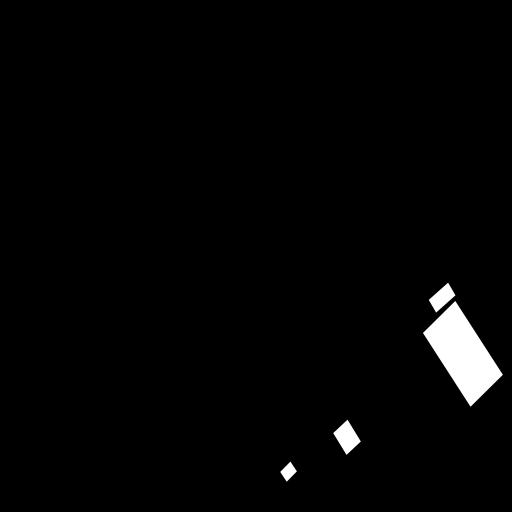

In [24]:
base = r'/home/shaun/python/uni_work/ML_project/input/val_gdal_mask'
file = r'rolleston_23040_13824.jpeg'
tar_im = os.path.join(base, file)
im = Image.open(tar_im)
na = np.array(im)
im

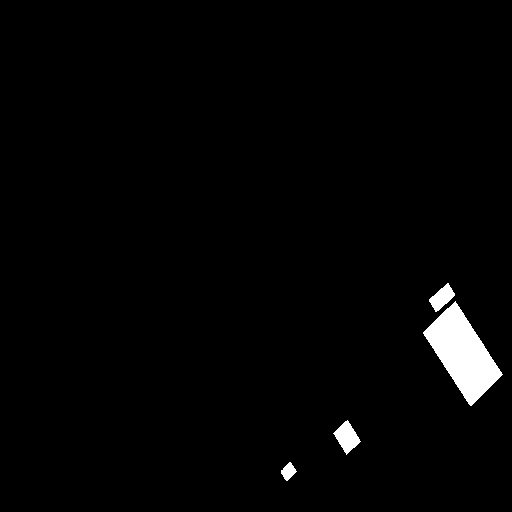

In [25]:
# pixels = im.load() # create the pixel map

for i in range(na.shape[0]): # for every pixel:
    for j in range(na.shape[1]):
        if na[i,j] > 100:
            na[i,j] = 255
        else:
            na[i,j] = 0
        
out = Image.fromarray(na)
out

In [19]:
def rescale_masks(base_in, file, base_out):
    impath = os.path.join(base_in, file)
    im = Image.open(impath)
    na = np.array(im)
    
    for i in range(na.shape[0]):
        for j in range(na.shape[1]):
            if na[i,j] > 100:
                na[i,j] = 255
            else:
                na[i,j] = 0

    out = Image.fromarray(na)
    out.save(os.path.join(base_out, file))
    im.close()
    out.close()

In [26]:
base = r'/home/shaun/python/uni_work/ML_project/input'
indir = os.path.join(base, 'mask_gdal_jpg')
outdir = os.path.join(base, 'rescaled_masks')
for file in os.listdir(indir):
    rescale_masks(indir, file, outdir)